# Digit Recognition

In this project, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://www.researchgate.net/profile/Hugo_Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png')

### Import Libraries 

In [2]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn

### Importing Data 

In [3]:
digit_train_df = pd.read_csv('digit_train.csv', sep = ',')

In [4]:
digit_test_df = pd.read_csv('digit_test.csv', sep = ',')

### Visualising Data for 'Digit Recognition dataset' 

In [5]:
digit_train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
digit_train_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
digit_train_df.shape

(42000, 785)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


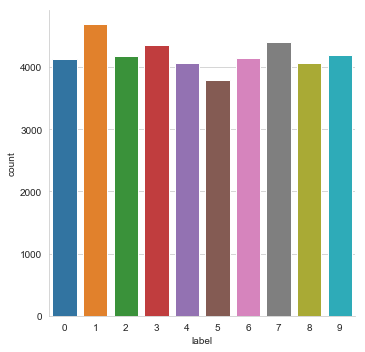

In [8]:
# Bar chart of frequency of digit occurance in our train dataset:
sns.factorplot('label', data=digit_train_df, kind='count')

In [9]:
# digit_test_df set doesn't have a label, so we want to use it for testing and submission
digit_test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
digit_test_df.shape

(28000, 784)

In [11]:
# Specify arrays (matrices) for training and testing data: 
training = np.array(digit_train_df, dtype = 'float32')

testing = np.array(digit_test_df, dtype = 'float32')

6.0


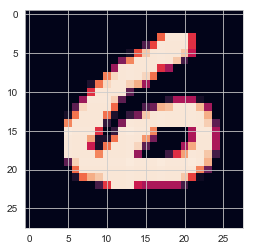

In [12]:
# Visualising digit in a random row (needs to be reshaped to original dimention 28x28):
from numpy import random
i = np.random.randint(1,42000)

plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
print(label)

### Training the Model 

In [13]:
# Normalise the data for training:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [14]:
# Normalise the data for testing 
X_test = testing/255

In [15]:
# Importing keras, Keras is a high-level neural networks API, written in Python and capable of running on top of 
# TensorFlow, CNTK, or Theano. 
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
# Importing train_test_split from sklearn:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state = 12345)

In [17]:
# Reshaping the data: 
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [18]:
# Data augmentation, (we rescaled the data previously so rescale = 1):
data_generator = ImageDataGenerator(rescale = 1, rotation_range = 12, zoom_range = 0.15, width_shift_range = 0.1,
                                    height_shift_range = 0.1)

data_generator.fit(X_train)
data_generator.fit(X_test)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [20]:
X_validate.shape

(8400, 28, 28, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras. optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
# Build model in a sequential form: 
cnn_model = Sequential()

In [23]:
# We can also use 64 kernels instead of 32, our imput shape (image) is of size 28x28x1 and activation function is relu:
cnn_model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', input_shape = (28,28,1), activation = 'relu'))

In [24]:
# Add max pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
# Add the following:
cnn_model.add(Conv2D(32, (3,3), activation = 'relu'))

In [26]:
# Add dropout
cnn_model.add(Dropout(0.5))

In [27]:
# Flatten the model (into one single array)
cnn_model.add(Flatten())

In [28]:
# Adding the dense function:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [29]:
# Replacing sigmoid activation function by softmax did not improve prediction:
cnn_model.add(Dense(output_dim = 10, activation = 'softmax'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [30]:
# Training the model with Adam optimizer:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [31]:
# Specify number of epochs and train the model on 50 epochs:
epochs = 50

In [32]:
cnn = cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, 
              validation_data = (X_validate, y_validate))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 60s 2ms/step - loss: 0.6355 - acc: 0.8017 - val_loss: 0.2139 - val_acc: 0.9368
Epoch 2/50
33600/33600 [==============================] - 56s 2ms/step - loss: 0.1715 - acc: 0.9498 - val_loss: 0.1136 - val_acc: 0.9673
Epoch 3/50
33600/33600 [==============================] - 57s 2ms/step - loss: 0.1089 - acc: 0.9678 - val_loss: 0.0952 - val_acc: 0.9696
Epoch 4/50
33600/33600 [==============================] - 56s 2ms/step - loss: 0.0877 - acc: 0.9729 - val_loss: 0.0750 - val_acc: 0.9774
Epoch 5/50
33600/33600 [==============================] - 56s 2ms/step - loss: 0.0664 - acc: 0.9796 - val_loss: 0.0641 - val_acc: 0.9819
Epoch 6/50
33600/33600 [==============================] - 57s 2ms/step - loss: 0.0571 - acc: 0.9824 - val_loss: 0.0600 - val_acc: 0.9814
Epoch 7/50
33600/33600 [==============================] - 59s 2ms/step - loss: 0.0509 - acc: 0.9844 - val_loss: 0.0537 - val_acc:

### Evaluating the Model

In [33]:
evaluation = cnn_model.evaluate(X_train, y_train)
print('Test acuracy: {:.3f}'.format(evaluation[1]))

33600/33600 [==============================] - 18s 545us/step
Test acuracy: 1.000


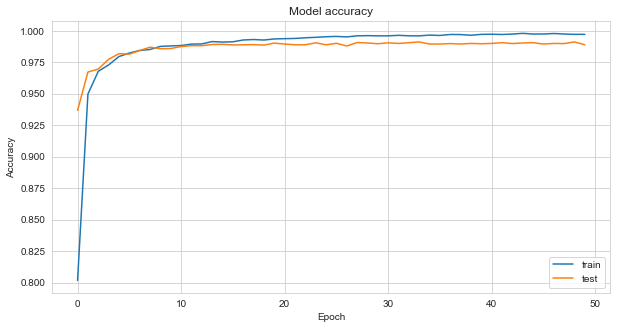

In [34]:
# Visualising the training model accuracy:
import os

plt.figure(figsize = (10,5))
#plt.subplot(2,1,1)
plt.plot(cnn.history['acc'])
plt.plot(cnn.history['val_acc'])

# Adding title, labels and legend:
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')

plt.show()

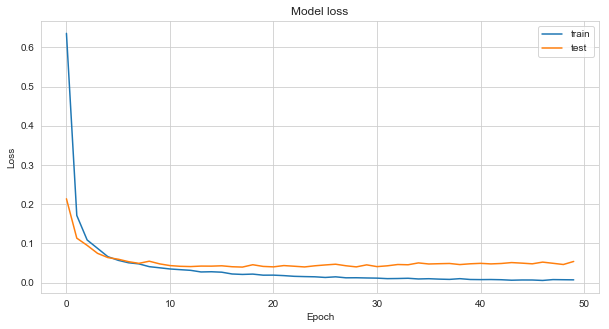

In [35]:
# Visualising the training model loss:
plt.figure(figsize = (10,5))
#plt.subplot(2,1,2)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])

# Adding title, labels and legend:
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')

plt.show()

In [36]:
# Evaluation with confution matrix:
predicted_classes = cnn_model.predict_classes(X_train)

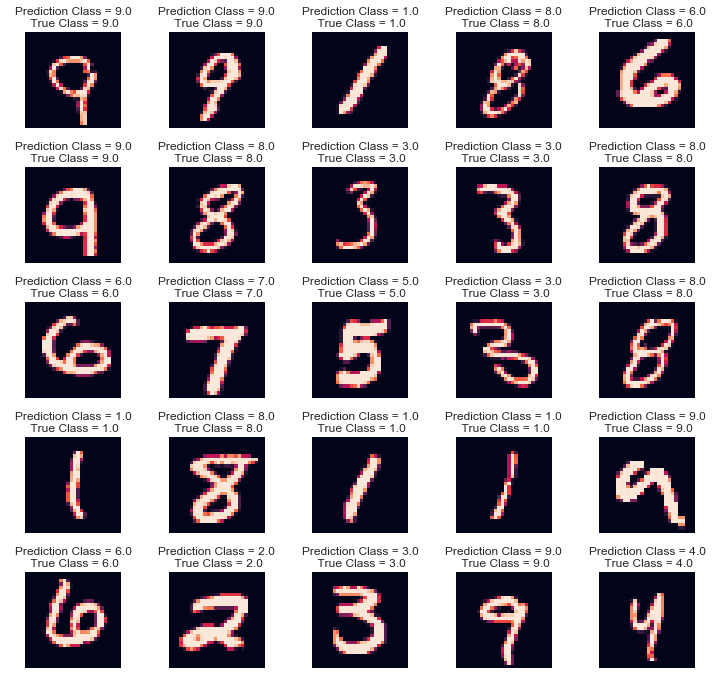

In [37]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_train[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i], y_train[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)    

In [38]:
# Importing the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predicted_classes)

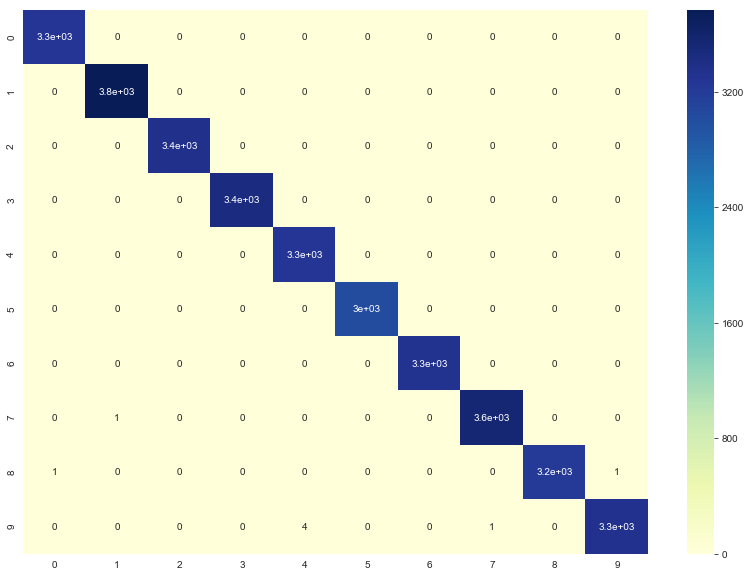

In [39]:
#Plotting heatmap for the confusion matrix:
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap='YlGnBu', annot = True)
# Sum the diogonal element to get the total true correct values

In [40]:
# To obtain classification report:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['label{}'.format(i) for i in range(num_classes)]

print(classification_report(y_train, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

      label0       1.00      1.00      1.00      3270
      label1       1.00      1.00      1.00      3763
      label2       1.00      1.00      1.00      3364
      label3       1.00      1.00      1.00      3447
      label4       1.00      1.00      1.00      3268
      label5       1.00      1.00      1.00      3022
      label6       1.00      1.00      1.00      3323
      label7       1.00      1.00      1.00      3557
      label8       1.00      1.00      1.00      3235
      label9       1.00      1.00      1.00      3351

   micro avg       1.00      1.00      1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600



### Make a prediction for testing set 

In [41]:
prediction = cnn_model.predict_classes(X_test)

In [42]:
prediction.shape

(28000,)

In [43]:
id_list = np.arange(1,28001)

In [44]:
id_list

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [45]:
# Combine ImageID and Label into one DataFrame:
final_result = pd.DataFrame({'Label': prediction, 'ImageId': id_list})
final_result = final_result[['ImageId', 'Label']]

In [46]:
# Downloading final_result dataset as digit_output.csv:
final_result.to_csv('digit_output.csv', index = False)